PHYS 3700 Lab 1

In the first part of this lab you will be simulating an analog signal to apply analog to digital conversion (ADC) methods and then reconstruct the signal with digital to analog conversion (DAC). The second part of this lab involves recording sound files on your computer then using Python to read/write and process those sound files.
Please complete the following in a Jupyter notebook and name it P3700_Lab1_lastname.ipynb. All requested plots need to be fully labelled. In addition to functional code, please fully explain what you’re doing and declare variables either by commenting your code or using markdown cells. Submit it to our course Moodle site.
1. ADC and DAC. Simulated Analog Signals, Sampling, Quantization, Filtering, Reconstruction.

(a) Generate 20 cycles of the “continuous” function (AS):

    V(t) = 0.3V sin(2π(50Hz)t) + 0.3V sin(2π(175Hz)t) + 0.3V sin(2π(60Hz)t) + 0.2V

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import math

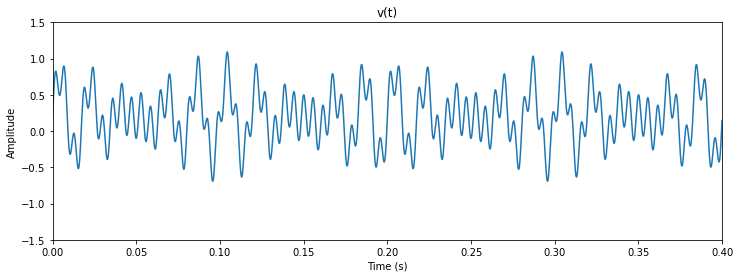

In [192]:
def v_t(t):
    '''This function for V(t) that takes a time parameter and returns the voltage'''
    v = 0.3*math.sin(2*math.pi*50*t)+0.3*math.sin(2*math.pi*175*t)+0.3*math.sin(2*math.pi*60*t)+.2
    return v

f=50                               # using 50 Hz as the frequency of v
T=1/f
cycles = 20
t = np.arange(0,cycles*T,.0001)    # "continuous" time sampled at 10000 Hz
v = [v_t(n) for n in t]            # "continuous" signal v generated 

plt.figure(figsize=(12,4))
plt.axis([0,.4,-1.5,1.5]) 
plt.plot(t,v)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("v(t)")
plt.show()


(b) Sample the function at 500 Hz. (Sample-and-Hold signal)

In [3]:
fs_500 = 500                          # sampling at 500 Hz
Ts_500 = 1/fs_500
t_500 = np.arange(0,cycles*T,Ts_500)  # sample times
v_500 = [v_t(n) for n in t_500]       # v at those sample times


(c) Run np.fft.fft(x_samp) on your Sample-and-Hold signal. Plot the absolute value of the Fourier spectrum and check that the peaks occur where you expect them too. Again, you can ignore the peaks on the right half of the graph.

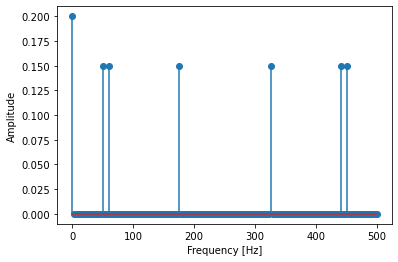

In [4]:
fft = np.fft.fft(v_500)        # Fourier transform of the sample and hold v
N_1 = len(v_500)              
f_1 = np.linspace(0, 1 / Ts_500, N_1)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.stem(f_1,np.abs(fft)/N_1)
plt.show()

(d) Using a 3-bit quantization scheme (2^3 levels), quantize your sampled values. (Quantized Signal) 
 - This step will take some planning. A given sample value needs to get assigned to a specific quantization level.
 - e.g. with 4 levels, 0 V, 1 V, 2 V, 3 V, a sampled value of 2.4456 V gets quantized to 2 V.

In [5]:
v_range = max(v_500)-min(v_500)         # the range of v in the sample and hold
q_level_size = v_range / 8              # the size of each quantization level
q_signal = [round(n/q_level_size,0)*q_level_size for n in v_500] # the signal quantized

(e) From your Quantized Signal produce a Zero-Order Hold (ZOH) list with the same number of elements as your original “continuous” signal.

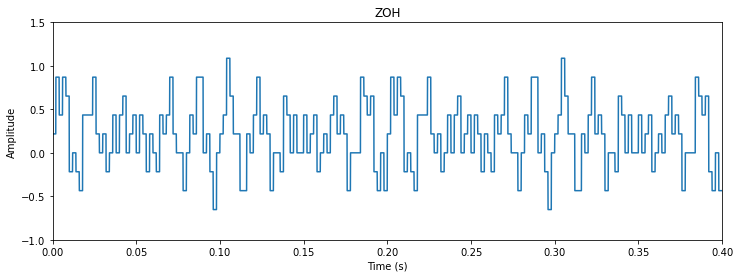

In [6]:
i = 0
q_signal_zoh = []

# this loop will create a Zero Order Hold by holding the quantized signal in the realm of 
#   the original "continuous" time, t, and holding the v valuve it until each new sample time
while (i < len(t)):
    q_signal_zoh.append(q_signal[math.floor(i/(len(t)/len(q_signal)))])
    i += 1
plt.figure(figsize=(12,4))
plt.axis([0,.4,-1,1.5])
plt.plot(t,q_signal_zoh)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ZOH")
plt.show()


(f) Plot quantization error (ZOH - AS) vs. time or sample number. Then plot a histogram of the quantization error with the mean and standard deviation displayed on the plot. Compare the mean and standard deviation to what you expect because of quantization.

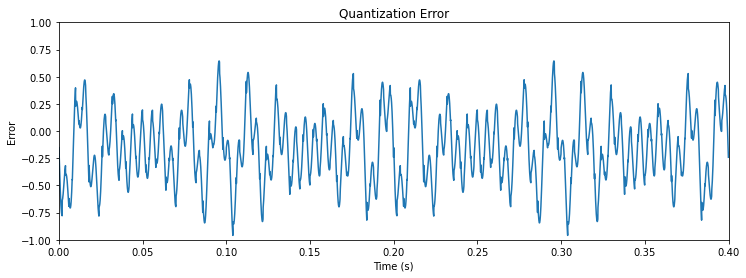

In [9]:
j = 0
q_error = []

# the loop captures the diference between quantized signal value and the signal v.
while j < len(v):
    q_error.append(q_signal_zoh[j]*q_level_size-v[j])
    j += 1

plt.figure(figsize=(12,4))
plt.axis([0,.4,-1,1]) 
plt.plot(t,q_error)
plt.xlabel("Time (s)")
plt.ylabel("Error")
plt.title("Quantization Error")
plt.show()


-0.15647405497194308
0.3120955200817827


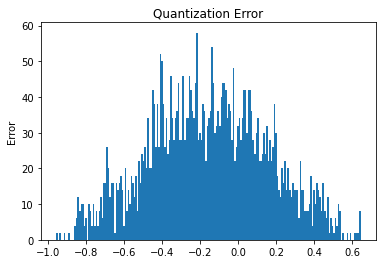

In [10]:
# displaying the quantized error
print(np.mean(q_error))
print(np.std(q_error))
plt.hist(q_error, 200)
plt.ylabel("Error")
plt.title("Quantization Error")
plt.show()

(g) Plot the “continuous” function, a step plot of the Sample-and-Hold Signal, a step plot of the Quantized Sample. Put all 3 plots all on one graph. Just plot 2 of your 10 cycles so that the plot is easier to read.

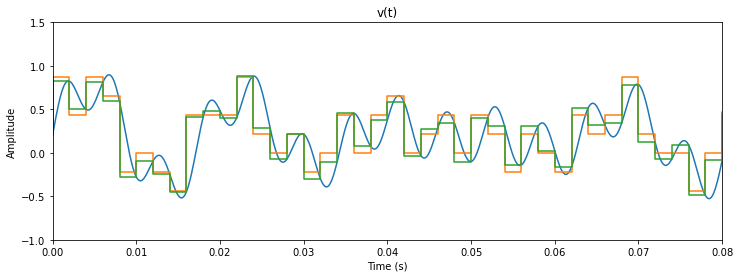

In [11]:
plt.figure(figsize=(12,4))
plt.axis([0,.08,-1,1.5])
plt.plot(t,v)
plt.step(t_500,q_signal)
plt.step(t_500,v_500)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("v(t)")
plt.show()

(h) Run np.fft.fft(x_zoh) on your ZOH Signal. Plot the absolute value of the Fourier spectrum and check that the peaks occur where you expect them too. Again, you can ignore the peaks on the right half of the graph. Notice the higher frequency clusters above the 3 main frequencies you expect. What do you think those higher frequencies represent in your ZOH graph?

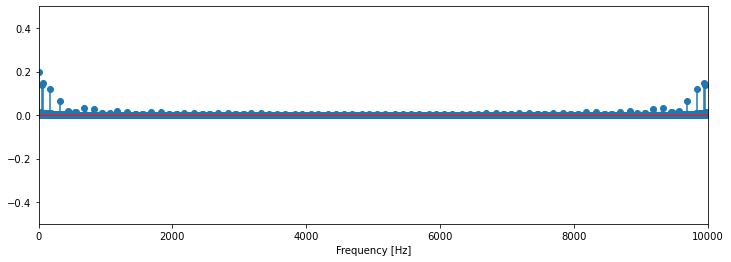

In [12]:
plt.figure(figsize=(12,4))
plt.axis([0,10000,-.5,.5]) 
fft = np.fft.fft(q_signal_zoh)       # Fourier transform of the ZOH data
N_2 = len(q_signal_zoh)
f_2 = np.linspace(0, 1 /.0001, N_2)
plt.xlabel("Frequency [Hz]")
plt.stem(f_2,np.abs(fft)/N_2)
plt.show()

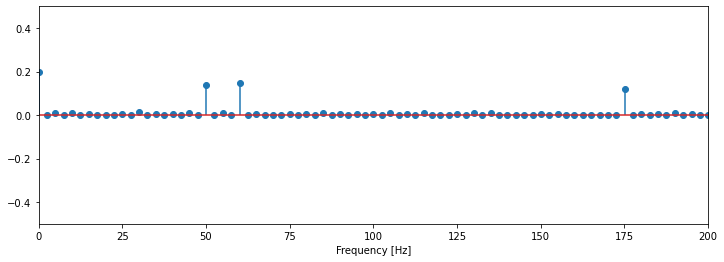

In [13]:
# plotting to show the orginal frequencies of signal were produced and no aliasing apparent
plt.figure(figsize=(12,4))
plt.axis([0,200,-.5,.5]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_2,np.abs(fft)/N_2)
plt.show()

(i) You’re now going to smooth your ZOH. The filter we will be using is called a Butterworth filter. The details will be presented in a couple weeks, but for now we’re just going to use it to remove the high frequency clusters in order to smooth our ZOH so it will reconstruct into something similar to our original AS. The following code will apply a Butterworth filter to your ZOH data.

    cutoff = 400 # cutoff frequency.
    #The intensity of all frequencies above this will be reduced.
    nyq = 0.5 * fs # fs is the sampling rate of x_zoh
    normal_cutoff = cutoff / nyq # normalized cutoff frequency
    b, a = signal.butter(5, normal_cutoff, ’low’)
    x_smooth = signal.filtfilt(b, a, x_zoh)

(j) Based on your frequency spectrum of your ZOH. What should your cutoff frequency be? What frequencies are actually in the signal and you would like to keep? Any frequencies higher than those in the actual signal should be filtered out.

Cut off should be set at 200 Hz since the orginal signal 


(k) On the same graph plot x_smooth when cutoff=1000 and when cutoff= the value you decided in the above question.

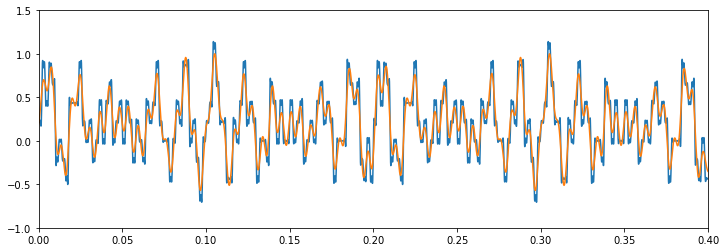

In [14]:
from scipy import signal
cutoff1 = 1000 # cutoff frequency.
nyq = 0.5 * 1/.0001 # fs is the sampling rate of x_zoh
normal_cutoff1 = cutoff1 / nyq # normalized cutoff frequency
b1, a1 = signal.butter(5, normal_cutoff1, 'low')
q_signal_smooth1 = signal.filtfilt(b1, a1, q_signal_zoh)

cutoff2 = 200 # cutoff frequency.
#The intensity of all frequencies above this will be reduced.
nyq = 0.5 * 1/.0001 # fs is the sampling rate of x_zoh
normal_cutoff2 = cutoff2 / nyq # normalized cutoff frequency
b2, a2 = signal.butter(5, normal_cutoff2, 'low')
q_signal_smooth2= signal.filtfilt(b2, a2, q_signal_zoh)

plt.figure(figsize=(12,4))
plt.axis([0,.4,-1,1.5]) 
plt.plot(t,q_signal_smooth1)
plt.plot(t,q_signal_smooth2)
plt.show()



(l) Plot the AS, ZOH and x_smooth (with the proper cutoff) on the same plot.

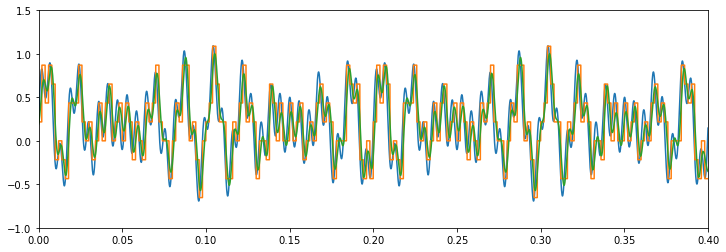

In [15]:
plt.figure(figsize=(12,4))
plt.axis([0,.4,-1,1.5]) 
plt.plot(t,v)
plt.plot(t,q_signal_zoh)
plt.plot(t,q_signal_smooth2)
plt.show()

(m) Run np.fft.fft(x_smooth) on your smoothed signal. Plot the absolute value of the Fourier
spectrum and check that the higher frequency clusters were removed.

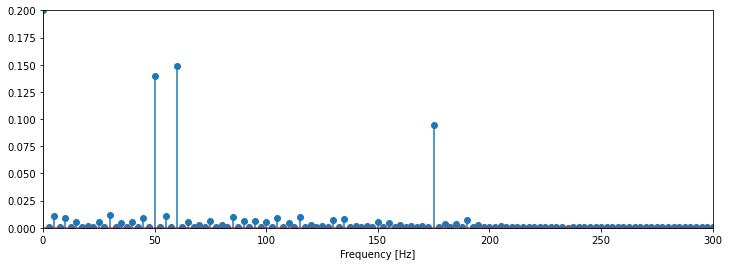

In [22]:
plt.figure(figsize=(12,4))
plt.axis([0,300,-0,.2]) 
fft3 = np.fft.fft(q_signal_smooth2)
N_3 = len(q_signal_smooth2)
f_3 = np.linspace(0, 1 /.0001, N_3)
plt.xlabel("Frequency [Hz]")
plt.stem(f_3,np.abs(fft3)/N_3)
plt.show()

(n) Write a summary of the ADC and DAC process. Don’t focus too much on how you did things, but talk about the effects of quantization, sampling, aliasing, and reconstructing a continuous signal from a discrete sample.

Analogue to digital conversion (ADC) involves the quantization of a continuous signal in order for a computer accurately represent the contiuous signal. A continuous signal has a amplitude value that have infinite posssible values at any point in time. Quantization puts the continuous signal in quantization levels so that a result of amplitude at a certain time is put in one of those levels, meaning that there is a fininte number of values that the amplitude can be. To accurately respresent the signal, the signal must me sampled (measured) at a rate that is at least twice the the frequency of the signal itself. If sampled less than twice the frequency of the actual signal, then aliasing occurs. If the signal is not sampled enough, aliasing causes that quantized signal to mimic a signal with a different frequency than the frequency of the actual signal. Once the signal is quantized it is possible reconstruct the original signal from the discrete sample. The signal can be recovered using a smothing technique in the digital to analoge (DAC) process.


2. Wav Files. Tuning forks and your voice.
- Use the Voice Recorder application on your computer to record the wav files for this section.
- If your application saves the audio files as m4a, you can use an online converter to save them as wav files.
- You can play wave files in Jupyter with the following bit of code import IPython

        IPython.display.Audio("violin.wav")
- You can read the wav file into a list with the following bit of code
       
       from scipy.io import wavfile
       fs, data = wavfile.read(’violin.wav’) #fs is the sampling rate
       x = data[:,0] # Left Channel
       y = data[:,1] # Right Channel
- Repeat the following steps for roughly 3 second samples of the "my fork" 2000 Hz, the "on file forks" 1024 Hz tuning fork, both the 512 Hz and 523.3 Hz at the same time, and you reading the following line

       The quick brown fox jumps over the lazy dog.


(a) Plot the entire waveform. You can use just one channel for the following steps.

<ipython-input-25-2aa748425f45>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_2000, data_2000 = wavfile.read('2000Hz.wav')


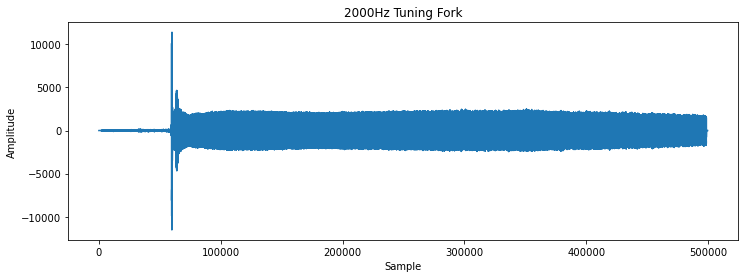

In [25]:
fs_2000, data_2000 = wavfile.read('2000Hz.wav')
plt.figure(figsize=(12,4))
plt.plot(data_2000)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('2000Hz Tuning Fork')
plt.show()

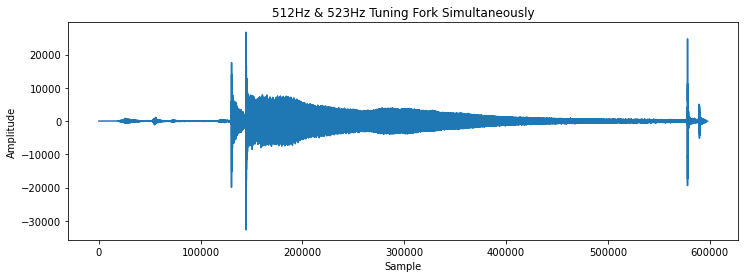

In [26]:
fs_512_523, data_512_523 = wavfile.read('512Hz-523Hz.wav') #fs is the sampling rate
x_512_523 = data_512_523[:,0] # Left Channel
plt.figure(figsize=(12,4))
plt.plot(x_512_523)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('512Hz & 523Hz Tuning Fork Simultaneously')
plt.show()

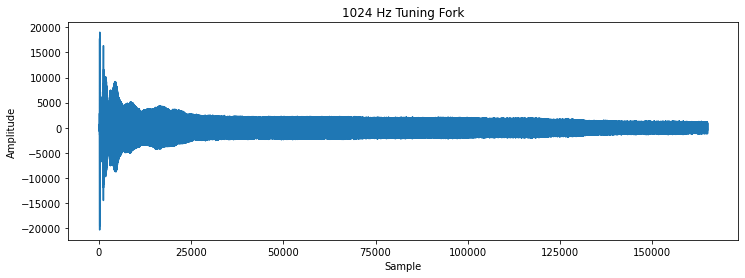

In [27]:
fs_1024, data_1024 = wavfile.read('1024Hz.wav') #fs is the sampling rate
x_1024 = data_1024[:,0] # Left Channel
plt.figure(figsize=(12,4))
plt.plot(x_1024)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('1024 Hz Tuning Fork')
plt.show()

<ipython-input-34-3b2f32b8d380>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_quick, data_quick = wavfile.read('TheQuick.wav') #fs is the sampling rate


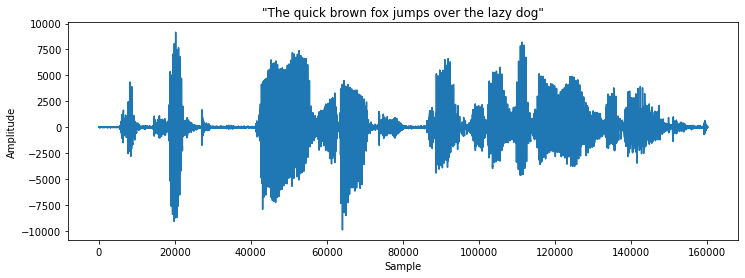

In [34]:
fs_quick, data_quick = wavfile.read('TheQuick.wav') #fs is the sampling rate
#x_quick = data_quick[:,0] # Left Channel
plt.figure(figsize=(12,4))
plt.plot(data_quick)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('"The quick brown fox jumps over the lazy dog"')
plt.show()

(b) Plot a segment of the waveform. Make the segment short enough that you can see some space between the variations in voltage. 

    e.g. plt.plot(x[1000:2000])

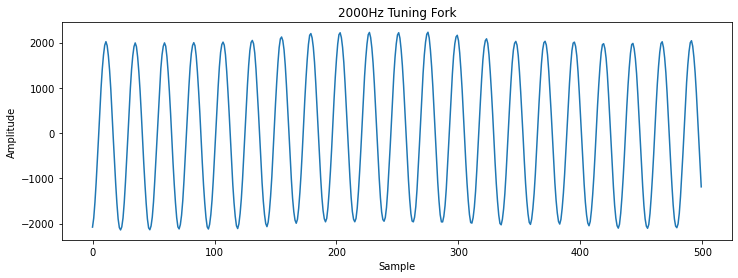

In [38]:
plt.figure(figsize=(12,4))
plt.plot(data_2000[100000:100500])
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('2000Hz Tuning Fork')
plt.show()

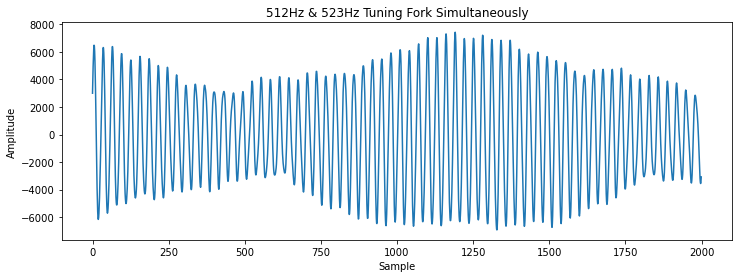

In [42]:
plt.figure(figsize=(12,4))
plt.plot(x_512_523[180000:182000])
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('512Hz & 523Hz Tuning Fork Simultaneously')
plt.show()

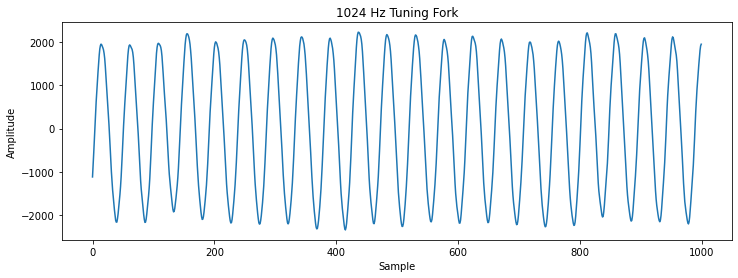

In [45]:
plt.figure(figsize=(12,4))
plt.plot(x_1024[40000:41000])
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('1024 Hz Tuning Fork')
plt.show()

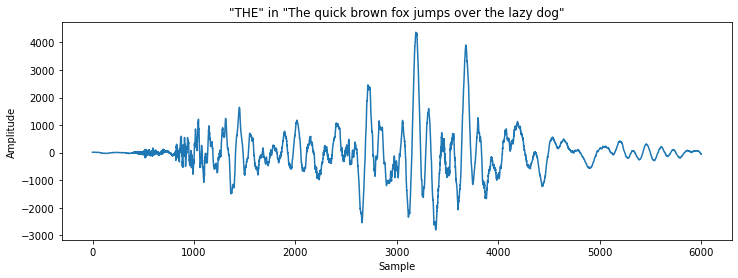

In [55]:
plt.figure(figsize=(12,4))
plt.plot(data_quick[5000:11000])
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title('"THE" in "The quick brown fox jumps over the lazy dog"')
plt.show()

(c) Apply a Fourier transform to the entire wave and plot the frequency spectrum. Identify the expected peak in frequency. You may need to make the y-axis a log scale. You don’t need to try and identify expected frequencies for your voice recording.

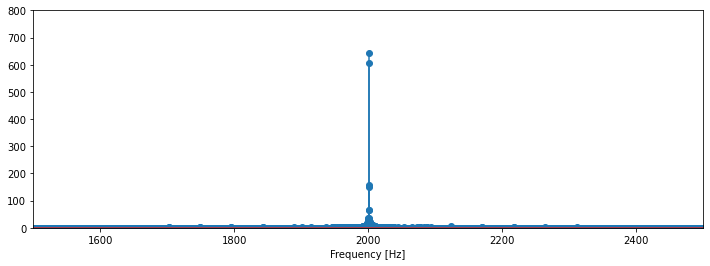

In [102]:
fft_2000 = np.fft.fft(data_2000)
N_2000 = len(data_2000)
f_2000 = np.linspace(0,fs_2000, N_2000)
plt.figure(figsize=(12,4))
plt.axis([1500,2500,0,800]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_2000,(np.abs(fft_2000)/N_2000))
plt.show()

The expected frequency is 2000Hz

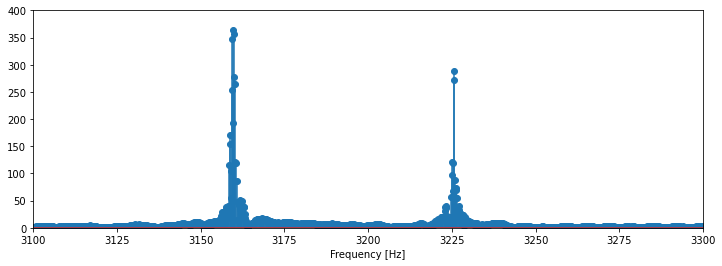

In [95]:
fft_512_523 = np.fft.fft(x_512_523)
N_512_523 = len(x_512_523)
f_512_523 = np.linspace(0,fs_512_523, N_512_523)
plt.figure(figsize=(12,4))
plt.axis([3100,3300,0,400]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_512_523,(np.abs(fft_512_523)/N_512_523))
plt.show()

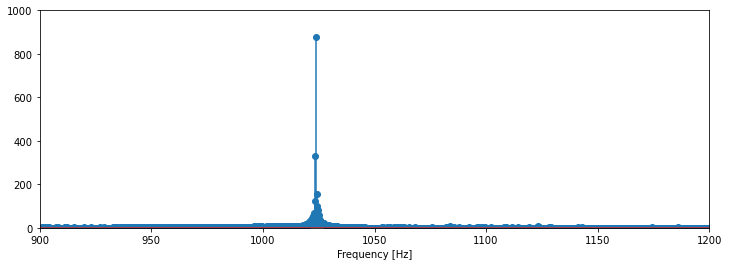

In [135]:
fft_1024 = np.fft.fft(x_1024)
N_1024 = len(x_1024)
f_1024 = np.linspace(0,fs_1024, N_1024)
plt.figure(figsize=(12,4))
plt.axis([900,1200,0,1000]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_1024,(np.abs(fft_1024)/N_1024))
plt.show()

The expected frequency of 1024 Hz

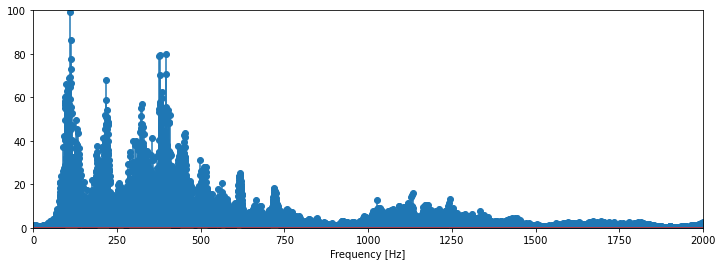

In [175]:
fft_quick = np.fft.fft(data_quick)
N_quick = len(data_quick)
f_quick = np.linspace(0,fs_quick, N_quick)

plt.figure(figsize=(12,4))
plt.axis([0,2000,0,100])
plt.xlabel("Frequency [Hz]")
plt.stem(f_quick,(np.abs(fft_quick)/N_quick))
plt.show()

(d) Your recording may be noisy so apply both a low-pass Butterworth filter and a high-pass But- terworth filter to remove high and low frequency noise without affecting your signal frequency. The code below will apply both.

In [98]:
def butterworth (high, low, fs, x):
    """This fuction takes a high and low limit, the sampling frequency and the values 
    of amplitude of a signal and returns the values of the signal with frequencies
    filtered using the high and low limits"""
    hi_cutoff = high
    nyq = 0.5 * fs
    normal_cutoff = hi_cutoff / nyq
    b, a = signal.butter(8, normal_cutoff, btype='high', analog=False)
    output = signal.filtfilt(b, a, x)
    low_cutoff = low
    nyq = 0.5 * fs
    normal_cutoff = low_cutoff / nyq
    b, a = signal.butter(8, normal_cutoff, btype='low', analog=False)
    output = signal.filtfilt(b, a, output)
    return output

In [169]:
# Butterworth high and low pass filter applied to tuning fork data
x_2000_butterw = butterworth (1800, 2200, fs_2000, data_2000) 
x_1024_butterw = butterworth (1000, 1150, fs_1024, x_1024)

(e) Apply a Fourier transform to the newly filtered wave and plot another frequency spectrum. Check that the high and low frequency noise has been reduced.

In [117]:
fft_2000_b = np.fft.fft(x_2000_butterw)
N_2000_b = len(x_2000_butterw)
f_2000_b = np.linspace(0,fs_2000, N_2000_b)


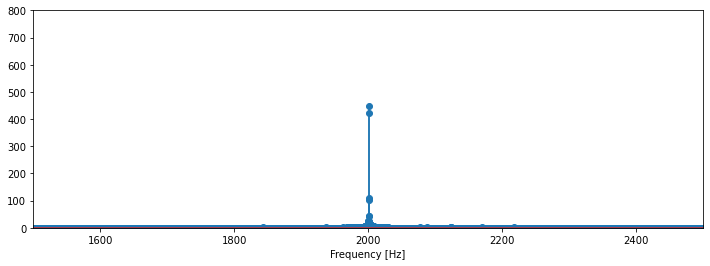

In [118]:
plt.figure(figsize=(12,4))
plt.axis([1500,2500,0,800]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_2000_b,(np.abs(fft_2000_b)/N_2000_b))
plt.show()

In [129]:
fft_1024_b = np.fft.fft(x_1024_butterw)
N_1024_b = len(x_1024_butterw)
f_1024_b = np.linspace(0,fs_1024,N_1024_b)

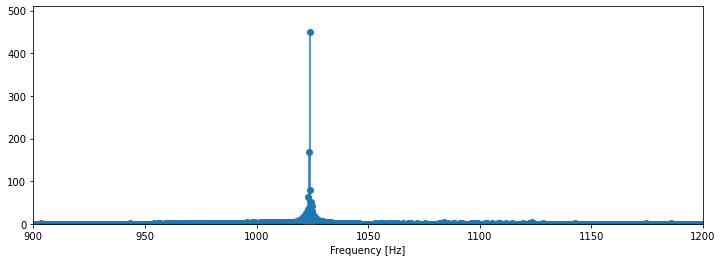

In [134]:
plt.figure(figsize=(12,4))
plt.axis([900,1200,0,510]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_1024_b,(np.abs(fft_1024_b)/N_1024_b))
plt.show()

(f) Write your filtered wave to a wav file and listen to it. The following bit of code will write your data to a wave file.

    filtered_out = np.asarray(output, dtype=np.int16)
    wavfile.write(’recording_filtered.wav’,fs,filtered_out)

In [183]:
filtered_out_2000Hz = np.asarray(x_2000_butterw, dtype=np.int16)
wavfile.write('2000Hz_filtered.wav',fs_2000,filtered_out_2000Hz)
filtered_out_1024Hz = np.asarray(x_1024_butterw, dtype=np.int16)
wavfile.write('1024Hz_filtered.wav',fs_1024,filtered_out_1024Hz)

(g) When you recorded two tuning forks at once, the beat frequency should be visible in the Fourier spectrum. Try to reduce noise in the recording, but do not filter the beat frequency.

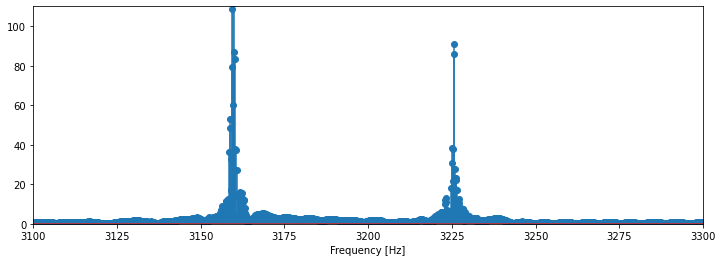

In [185]:
x_512_523_butterw = butterworth (3150, 3250, fs_512_523, x_512_523)
fft_512_523_b = np.fft.fft(x_512_523_butterw)
N_512_523_b = len(x_512_523_butterw)
f_512_523_b = np.linspace(0,fs_512_523,N_512_523_b)
plt.figure(figsize=(12,4))
plt.axis([3100,3300,0,110]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_512_523_b,(np.abs(fft_512_523_b)/N_512_523_b))
plt.show()

In [189]:
filtered_out_512_523Hz = np.asarray(x_512_523_butterw, dtype=np.int16)
wavfile.write('512_523_Hz_filtered.wav',fs_512_523,filtered_out_512_523Hz)

(h) With your voice recording, you can try different filter frequencies, but in the end, save a wav file with the low frequencies filtered.

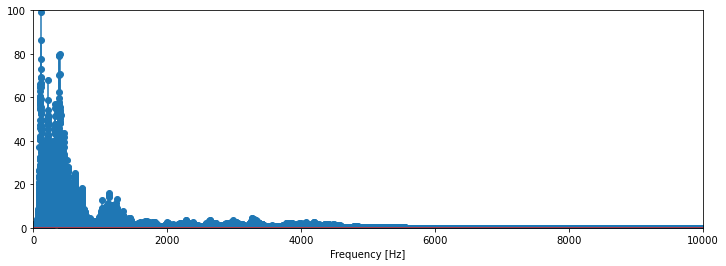

In [188]:
def low_filter(low, fs, x):
    """This funtion take a low frequency limit, a frequency sampleing rate, and the 
    values of amplitude of for a signal and returns the filtered version of the signal"""
    low_cutoff = low
    nyq = 0.5 * fs
    normal_cutoff = low_cutoff / nyq
    b, a = signal.butter(8, normal_cutoff, btype='low', analog=False)
    output = signal.filtfilt(b, a, x)
    return output

x_quick_low = low_filter(5000, fs_quick, data_quick)
fft_quick_low = np.fft.fft(x_quick_low)
N_quick_low = len(x_quick_low)
f_quick_low = np.linspace(0,fs_quick, N_quick_low)

plt.figure(figsize=(12,4))
plt.axis([0,10000,0,100]) 
plt.xlabel("Frequency [Hz]")
plt.stem(f_quick_low,(np.abs(fft_quick_low)/N_quick_low))
plt.show()
filtered_out_quick = np.asarray(x_quick_low, dtype=np.int16)

wavfile.write('quick_filtered.wav',fs_quick,filtered_out_quick)